# Data 

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
housing = pd.read_csv("data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# convert categorical data to numerical data
le = LabelEncoder()
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


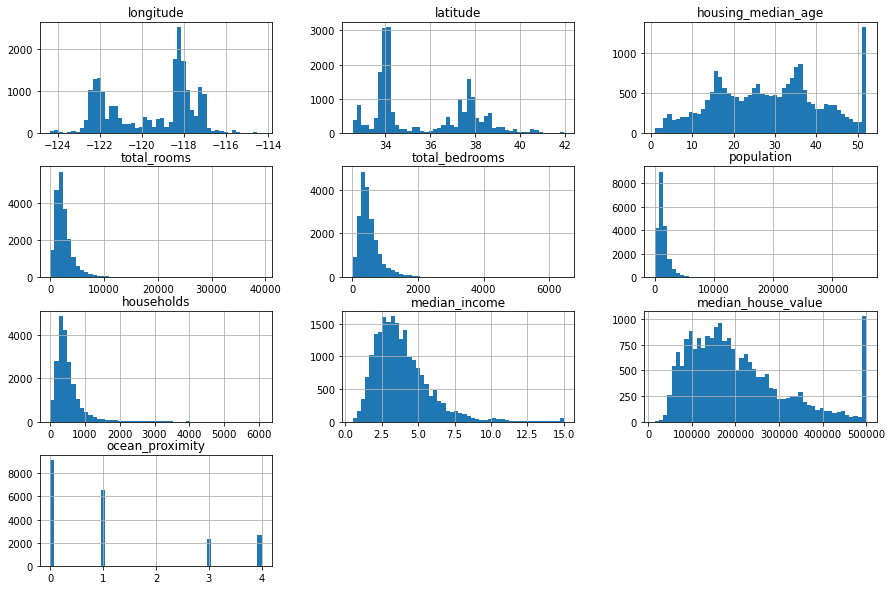

In [7]:
housing.hist(bins=50, figsize=(15,10))
plt.savefig("data/images/histograms.png")
plt.show()

# Stratified Sampling

### Most of the median income clusters around 1.5 to 6.0. 

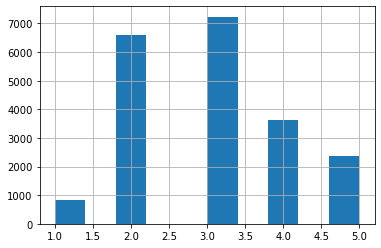

In [8]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

### Stratified Sampling is used to divide the population into various subsets and treat each subset as a separate population. We performed stratified sampling based on the income category above. 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


### We remove the income category attribute to get the data back to its original form.

In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
housing = strat_train_set.copy()

### Visualize the dataset based on geographical locations 

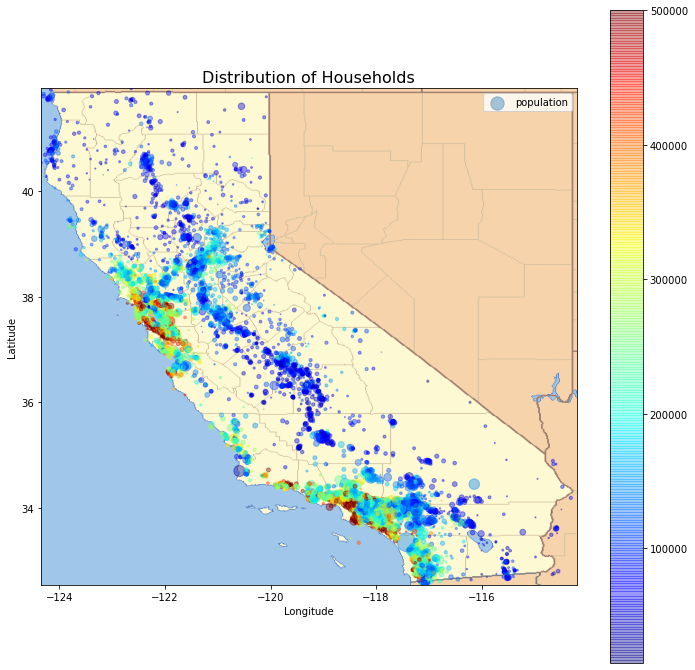

In [11]:
plt.figure(figsize=(12,12))
img=plt.imread("data/california.png")
plt.imshow(img, zorder=0, extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.4, s=housing['population']/100, label='population',
         c=housing['median_house_value'], cmap=plt.get_cmap('jet'), zorder=1)
plt.colorbar()
plt.title("Distribution of Households", size=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.savefig("data/images/CA.png")

### The red marks represent the most expensive locations while the blue marks represents the more cheaper locations. The larger circles indicate areas with a larger population. It can be inferred that housing prices are related to the location and the population density. 

# Correlations

### Calculate the standard correlation coefficient between each pair of attributes

In [12]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
ocean_proximity       0.076990
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### The closer the correlation coefficient is to 1 shows that there is a positive correlation. The closer the correlation coefficient is to -1 shows that there is a negative correlation. When it is close to 0, it means that there is no linear correlation.

### This visualizes the attributes that are likely to be correlated. 

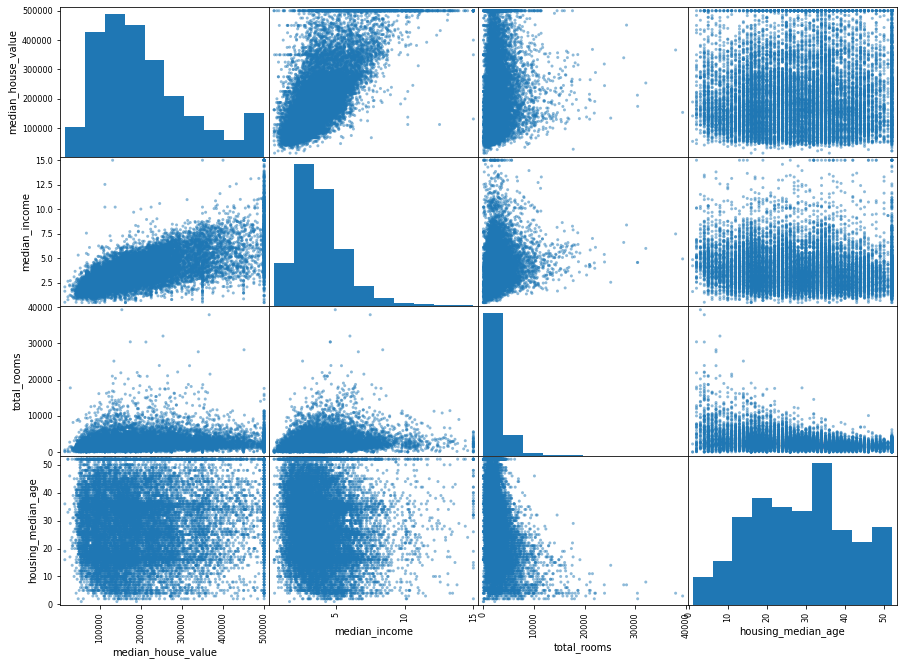

In [13]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(15,11))
plt.savefig("data/images/scatter_matrix_plot.png")

### The correlation between median_income and median_house_value is the strongest. The correlation matrix shows that the correlation coefficient is 0.688075. The second graph in the first row in the above scatter matrix shows the positive correlation between these two attributes and that the price caps out at 500k. 

### We then created the following new attributes: number of rooms per household, bedrooms per rooms, population per household.

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [15]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
ocean_proximity             0.076990
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

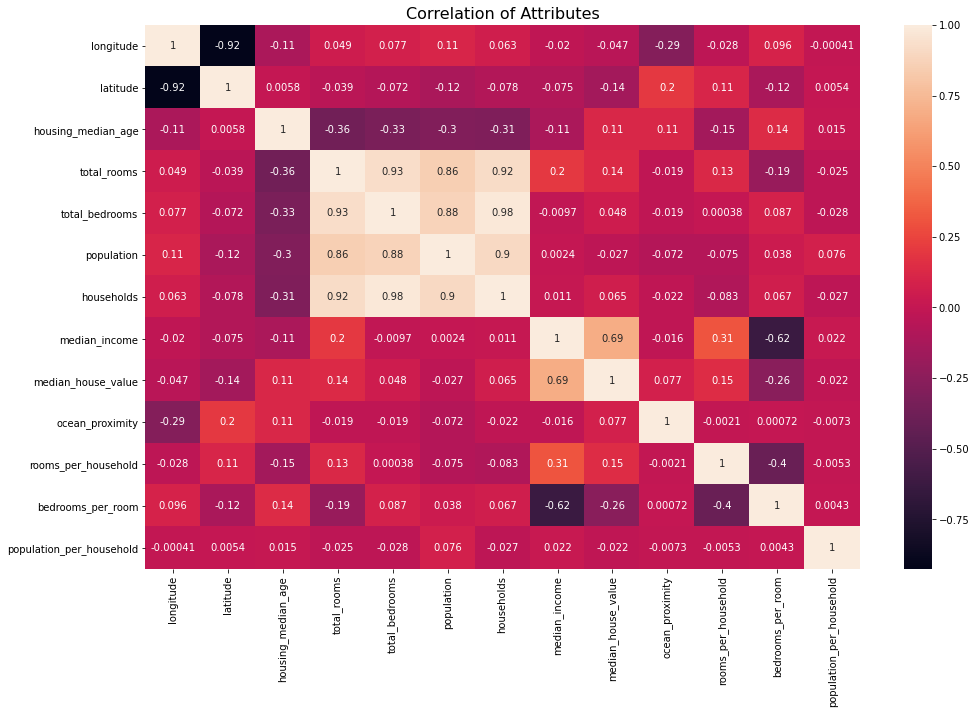

In [16]:
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), annot=True)
plt.title("Correlation of Attributes", size=16)
plt.savefig("data/images/heatmap.png")

In [17]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.285428,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.196195,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,0.113492,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,-0.018953,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,-0.019466,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.072221,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.022056,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,-0.016234,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.076990,0.146285,-0.259984,-0.021985
ocean_proximity,-0.285428,0.196195,0.113492,-0.018953,-0.019466,-0.072221,-0.022056,-0.016234,0.076990,1.000000,-0.002061,0.000724,-0.007254


In [18]:

# Get column names first
names = housing.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.156043,0.771950,0.743331,-0.493234,-0.445796,-0.636211,-0.420698,-0.614937,0.688068,-0.823116,-0.312055,0.191261,-0.086499
1,-1.176025,0.659695,-1.165317,-0.908967,-1.034621,-0.998331,-1.022227,1.336459,1.154794,-0.823116,0.217683,-0.938008,-0.033534
2,1.186849,-1.342183,0.186642,-0.313660,-0.155018,-0.433639,-0.093318,-0.532046,-0.087217,1.993147,-0.465315,0.495194,-0.092405
3,-0.017068,0.313576,-0.290520,-0.362762,-0.397333,0.036041,-0.383436,-1.045566,-1.388864,-0.119050,-0.079661,-0.209345,0.089736
4,0.492474,-0.659299,-0.926736,1.856193,2.398979,2.724154,2.570975,-0.441437,0.410625,-0.823116,-0.357834,0.321782,-0.004194


In [19]:
# check for null values
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

# Data Preparation

In [20]:
# Data Preparation
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_preparation = full_pipeline.transform(data)
print("Predictions: ", lin_reg.predict(data_preparation))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


# Decision Tree Regression

In [22]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
print(housing.shape)
print(X.shape)
print(Y.shape)

(16512, 9)
(16512, 9)
(16512,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(13209, 9) (13209,)
(3303, 9) (3303,)


In [25]:
dtreg= DecisionTreeRegressor()
dtreg.fit(x_train, y_train)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_predict = dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))